In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('C:/Users/pc/Desktop/Mini Project/Mini Project/DataSet_HAR.csv', delimiter=',')

In [3]:
random = 0 
tree_nodes = 20

Random Forest with All Features

In [4]:
train = data.sample(frac = 0.7,random_state = random)
test = data[~data.index.isin(train.index)]
#data.columns


In [5]:
X = train[train.columns[:-2]]
Y = train.Activity

ranFor = rfc(n_estimators=tree_nodes, random_state=random, n_jobs=4,
             warm_start=True, oob_score=True)

ranFor = ranFor.fit(X, Y)
ranFor.oob_score_

0.95880149812734083

Random Forest w/ Selected Top Variables

In [6]:
ranForFeature = pd.DataFrame({'Feature':X.columns,'Importance':ranFor.feature_importances_})

ranForFeature.sort_values(by = 'Importance',ascending=False,inplace=True)
print(ranForFeature)


                                Feature  Importance
558                angle(X,gravityMean)    0.048610
56               tGravityAcc-energy()-X    0.037963
41                 tGravityAcc-mean()-Y    0.027129
559                angle(Y,gravityMean)    0.026012
53                  tGravityAcc-min()-Y    0.024632
52                  tGravityAcc-min()-X    0.023658
381      fBodyAccJerk-bandsEnergy()-1,8    0.020617
99                 tBodyAccJerk-iqr()-X    0.020448
344               fBodyAccJerk-mean()-X    0.020240
231               tBodyAccJerkMag-sma()    0.020213
54                  tGravityAcc-min()-Z    0.018707
560                angle(Z,gravityMean)    0.012831
9                      tBodyAcc-max()-X    0.012524
345               fBodyAccJerk-mean()-Y    0.012000
40                 tGravityAcc-mean()-X    0.011823
50                  tGravityAcc-max()-Y    0.011432
75            tGravityAcc-arCoeff()-Z,3    0.011106
503                   fBodyAccMag-std()    0.010983
348         

In [7]:
n = 15
#n = 6
#n = 7
ranFor_model = [col for col in ranForFeature.Feature[:n].values]

In [8]:
score = {}

for cols in range(n):
    X = train[[col for col in ranForFeature['Feature'][:cols+1].values]]
    Y = train.Activity
    
    select_feature = rfc(n_estimators=tree_nodes, random_state=random, n_jobs=4,
                 warm_start=False, oob_score=True)
    
    select_feature = select_feature.fit(X, Y)
    accuracy = accuracy_score(Y,select_feature.predict(X))
    
    score[cols+1] = [cols+1,select_feature.oob_score_,accuracy]

select_tab =pd.DataFrame.from_dict(score).transpose()
select_tab.columns = ['# of Features','oob Score','Accuracy']
print(select_tab)

    # of Features  oob Score  Accuracy
1             1.0   0.406298  0.978083
2             2.0   0.581495  0.993619
3             3.0   0.752948  0.996671
4             4.0   0.756970  0.995977
5             5.0   0.779720  0.997642
6             6.0   0.828270  0.998890
7             7.0   0.909557  0.998335
8             8.0   0.917742  0.998197
9             9.0   0.913580  0.998058
10           10.0   0.925094  0.999168
11           11.0   0.942156  0.999306
12           12.0   0.945485  0.999584
13           13.0   0.950201  0.999723
14           14.0   0.949091  0.999445
15           15.0   0.953253  0.999306


In [9]:
final_train = Y
predict = select_feature.predict(X)

confusion_matrix(final_train,predict)

array([[1353,    0,    0,    0,    0,    0],
       [   0, 1238,    1,    0,    0,    0],
       [   0,    0, 1357,    0,    0,    0],
       [   0,    0,    0, 1205,    1,    0],
       [   0,    0,    0,    0,  980,    3],
       [   0,    0,    0,    0,    0, 1071]], dtype=int64)

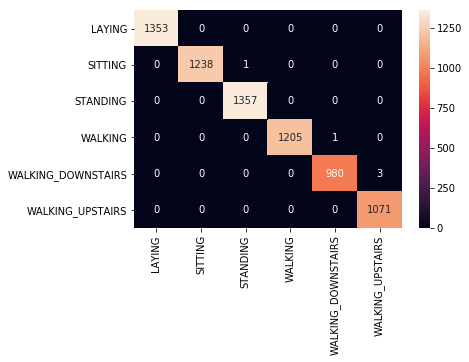

In [10]:
sns.heatmap(data=confusion_matrix(final_train,predict), fmt='.0f', annot=True,
            xticklabels=np.unique(final_train), yticklabels=np.unique(final_train))

Support Vector Machine

In [11]:
X = train[train.columns[:-2]]
Y = train.Activity
random = 0
tree_node = 20

svm = rfc(n_estimators=tree_nodes, random_state=random, n_jobs=4,
             warm_start=True, oob_score=True)
svm=svm.fit(X, Y)

svm_model = pd.DataFrame({'Feature':X.columns,'Importance':svm.feature_importances_})
svm_model.sort_values(by='Importance', ascending=False, inplace=True)

nodes = 4
svm_model = [col for col in svm_model.Feature[:nodes].values] + [svm_model.Feature[6]]

In [12]:
X = train[svm_model]
Y = train.Activity

X_test = test[X.columns]
Y_test = test.Activity

In [13]:
svm1 = SVC()
svm1_model = svm1.fit(X,Y)

predY_train = svm1_model.predict(X)
predY_test = svm1_model.predict(X_test)

accuracy_train = accuracy_score(Y,predY_train)
accuracy_test = accuracy_score(Y_test, predY_test)

print('SVM Accuracy: Training %.4f Testing %.4f' % (accuracy_train,accuracy_test))

SVM Accuracy: Training 0.8057 Testing 0.8110


In [14]:
confusion_matrix(Y,predY_train)

array([[1353,    0,    0,    0,    0,    0],
       [   7, 1018,  212,    2,    0,    0],
       [   0,  171, 1186,    0,    0,    0],
       [   0,    0,    0,  935,  110,  161],
       [   0,    0,    0,  201,  713,   69],
       [   0,    0,    0,  387,   81,  603]], dtype=int64)

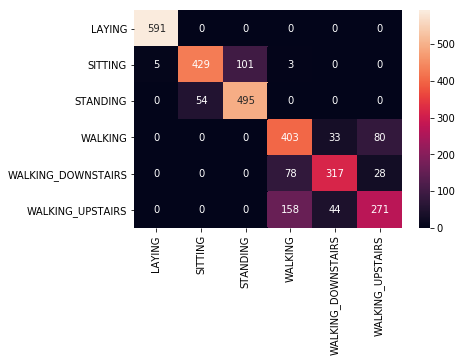

In [15]:
sns.heatmap(data=confusion_matrix(Y_test,predY_test), fmt='.0f', annot=True,
            xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))